# Zomato Analysis
# Domain : E-Commerece

---

### - About This Project :
In this project, we aim to analyze Zomato restaurant data to identify key factors
that contribute to the success of restaurants, as measured by their ratings. By
exploring various features such as location, cuisine, pricing, and service
offerings, we aim to provide insights that can help restaurant owners and
Zomato users make informed decisions.

---

### - EDA with Zomato Data :
Exploratory Data Analysis (EDA) serves as an initial phase in the realm of
Machine Learning, extensively employed to gain a profound understanding
of the dataset. While not mandatory for model development, EDA is strongly
recommended as it facilitates a nuanced comprehension of the data. When
executed meticulously, EDA unveils insights that may not be readily
apparent.

---

### - Project Flow :
1. Data Collection
2. Data Cleaning & Preprocessing
    - Handling missing values
    - Handling outliers
3. Exploratory Data Analysis (EDA)
4. Conclusion
5. Recommendation


In [2]:
## importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # For visualizartion
import seaborn as sns # For advance visualization

import warnings
warnings.filterwarnings("ignore")

### Data Overview:
- Explore the basic characteristics of the dataset, including dimensions, data
 types, and missing values.

In [4]:
## Data loading
data = pd.read_csv("Indian-Resturants.csv")

In [5]:
## Let's look at the number of rows and columns
data.shape

(211944, 26)

In [6]:
## Displaying the first 5 rows of the dataset
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [7]:
## let's see info of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [8]:
## Checking for missing values in the dataset
data.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

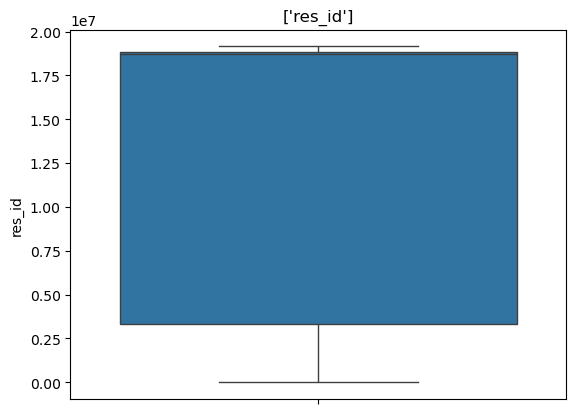

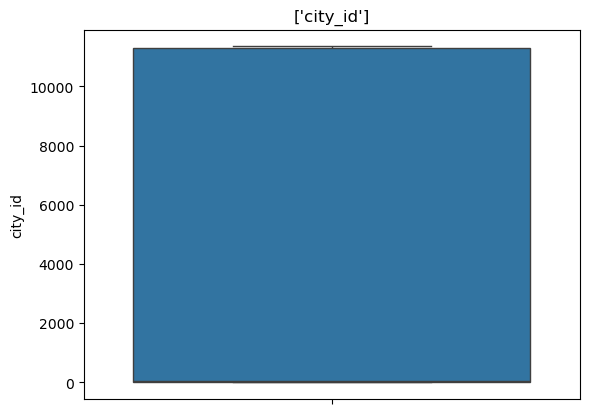

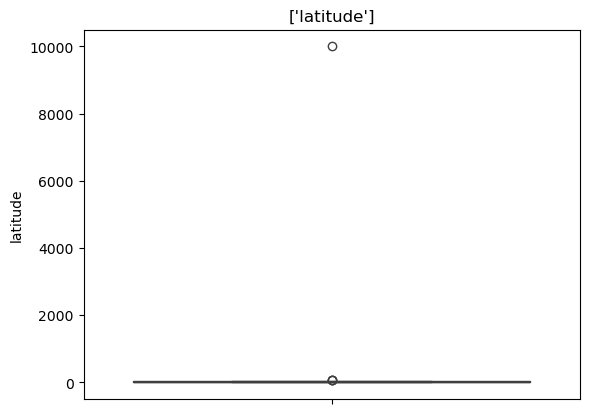

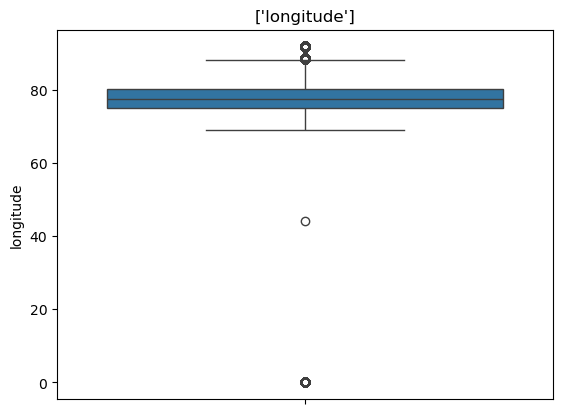

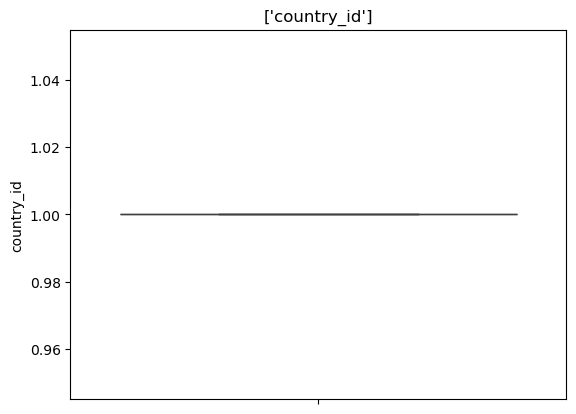

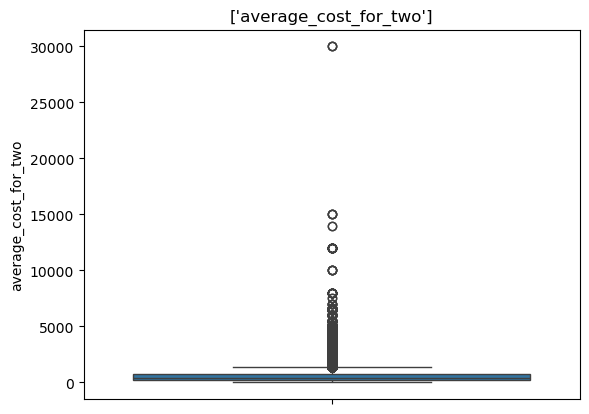

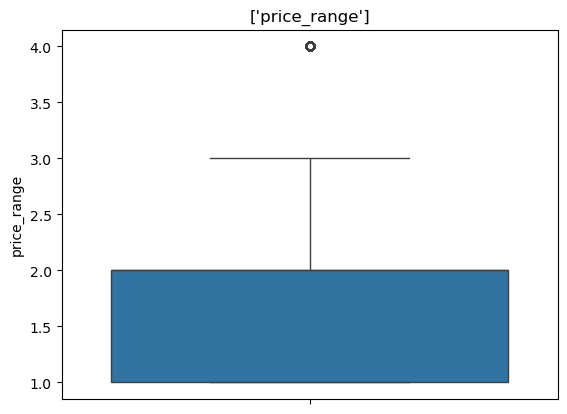

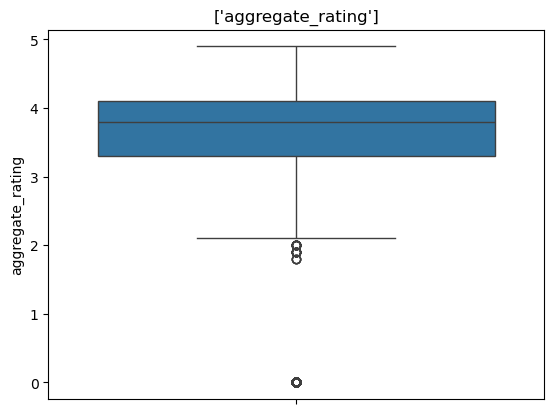

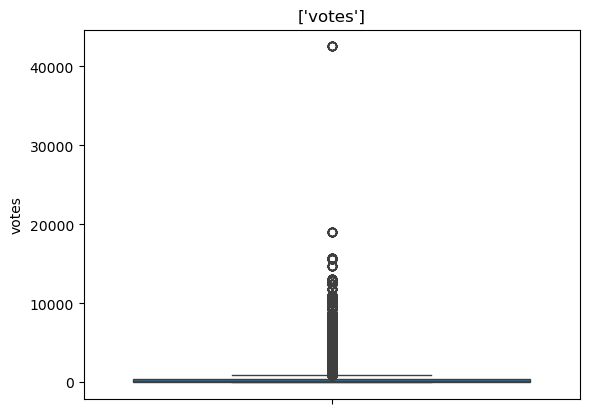

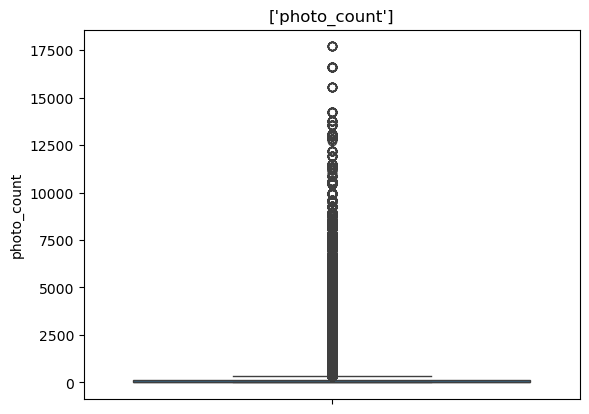

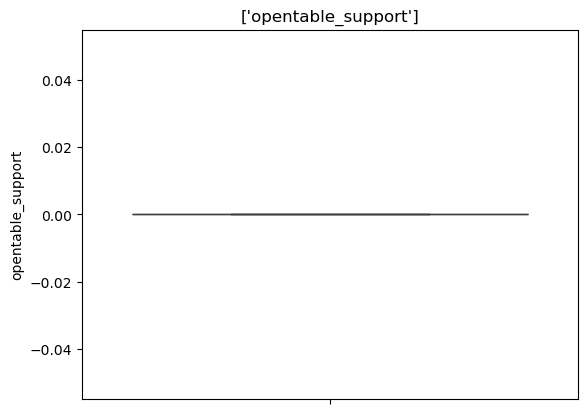

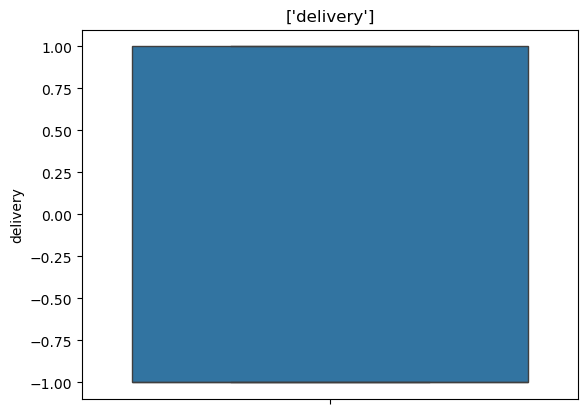

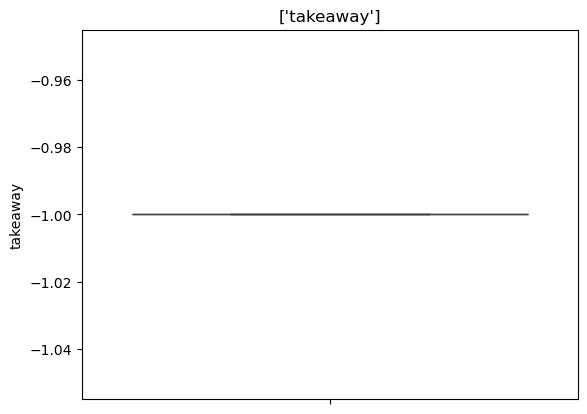

In [9]:
## check for outliers in the numerical columns
for i in data.select_dtypes(include = ["int64","float64"]):
    sns.boxplot(data[i])
    plt.title([i])
    plt.show()

### Handling outliers using the IQR method

In [11]:
for i in data.select_dtypes("int64","float64"):
    q1 = data[i].quantile(0.25)
    q3 = data[i].quantile(0.75)

    iqr = q3-q1

    ul = q3+1.5*iqr
    ll = q1-1.5*iqr
    
    data[i] = np.where(data[i]>ul,ul,
                      np.where(data[i]<ll,ll,
                              data[i]))

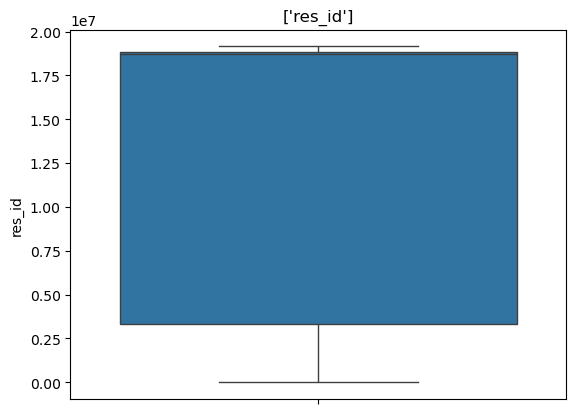

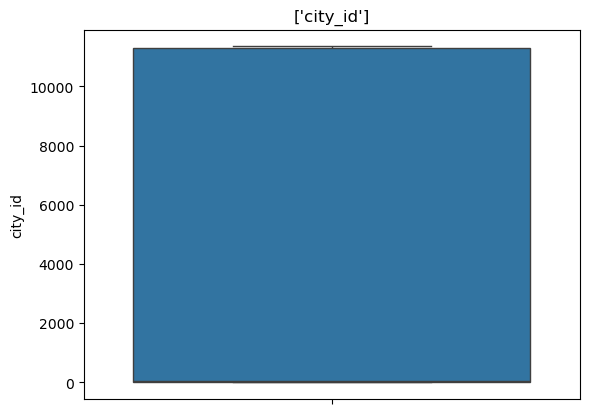

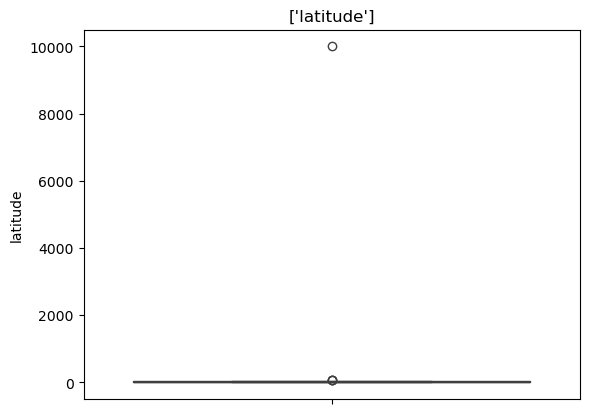

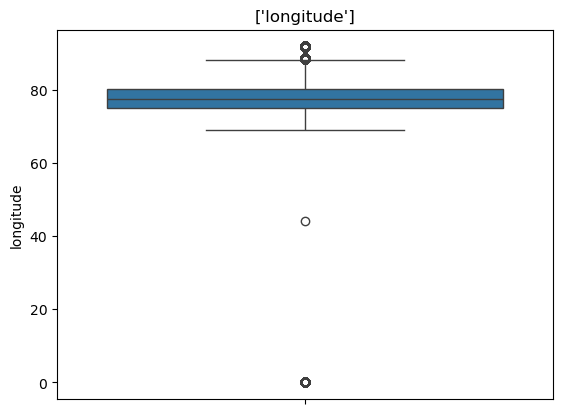

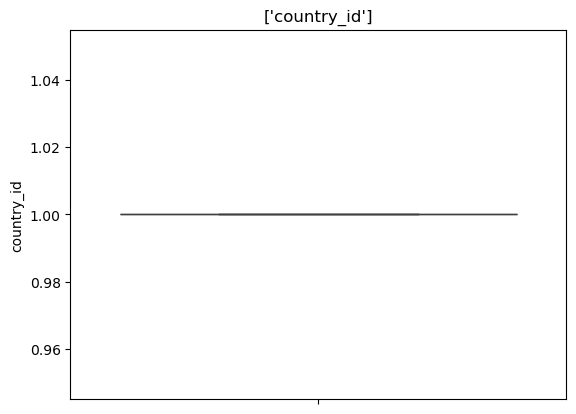

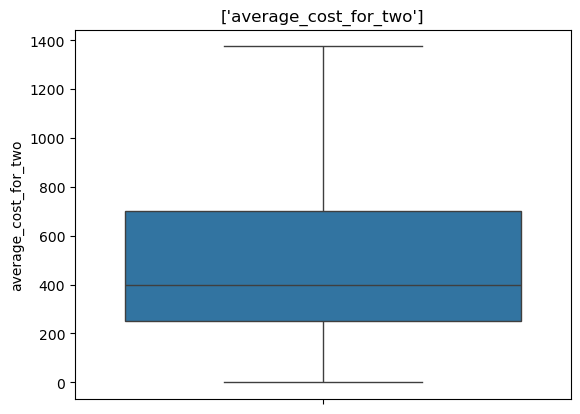

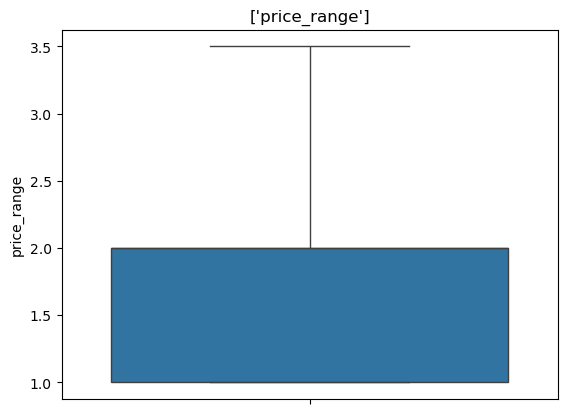

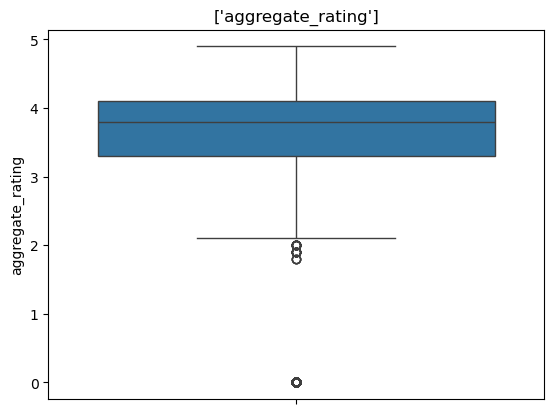

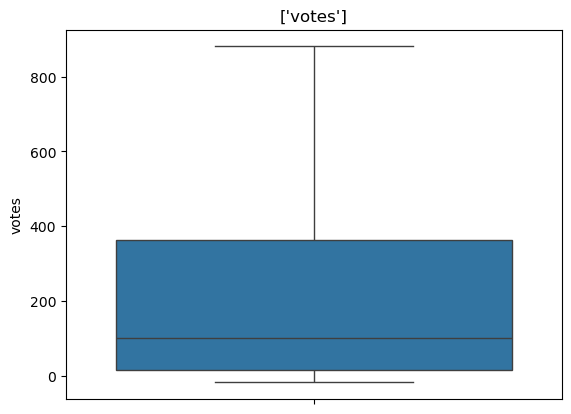

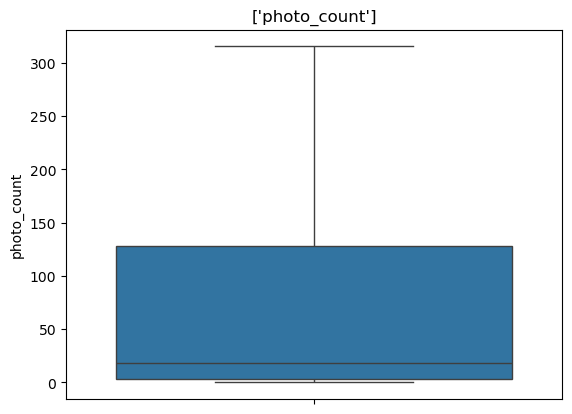

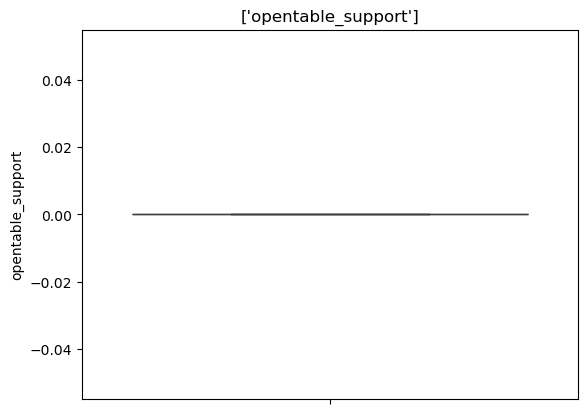

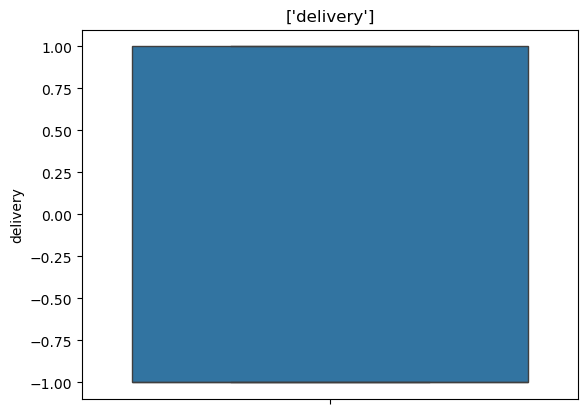

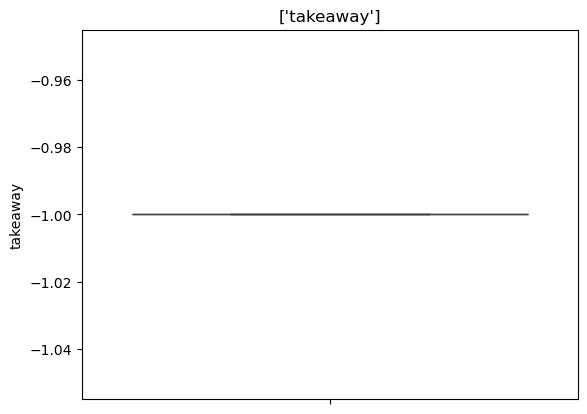

In [12]:
for i in data.select_dtypes(include = ["int64","float64"]):
    sns.boxplot(data[i])
    plt.title([i])
    plt.show()

### Handling missing values

In [14]:
data.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [15]:
## Handling missing values for categorical values
categorical_values = ["address","cuisines","timings"]
for i in categorical_values:
    data[i] =  data[i].fillna(data[i].mode()[0])

In [16]:
## Fill missing values with the mean
data["opentable_support"] = data["opentable_support"].fillna(data["opentable_support"].mean())

In [17]:
## Drop zipcode because missing values are more than 75%
data.drop("zipcode", axis = 1, inplace = True)

In [18]:
data.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

### Basic Statistics:
- Calculate and visualize the average rating of restaurants.
- Analyze the distribution of restaurant ratings to understand the overall rating
 landscape.

Average rating of restaurants is 3.3959366625146266


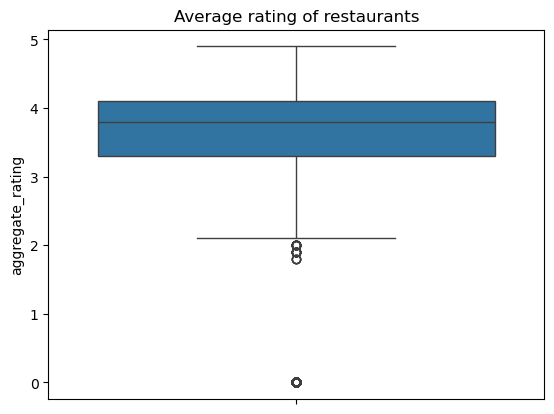

In [20]:
## Visualizing the average rating of restaurants.
a = data["aggregate_rating"].mean()
print(f"Average rating of restaurants is {a}")
sns.boxplot(data["aggregate_rating"])
plt.title("Average rating of restaurants")
plt.show()

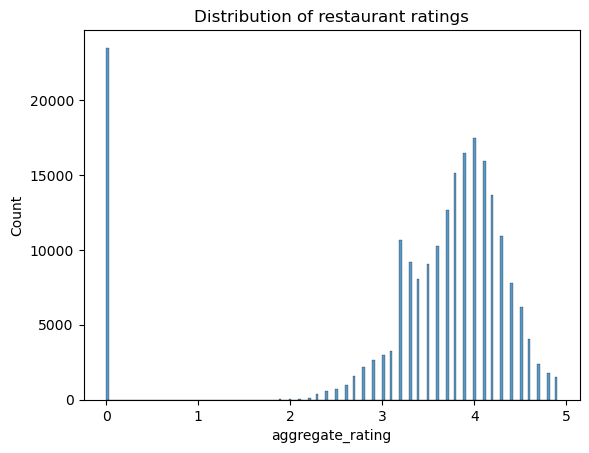

In [21]:
## Showing the distribution of restaurant ratings
sns.histplot(data["aggregate_rating"])
plt.title("Distribution of restaurant ratings")
plt.show()

### Location Analysis:
-  Identify the city with the highest concentration of restaurants.

city
Chennai      11630
Mumbai        6497
Bangalore     4971
Pune          4217
Lucknow       4121
Jabalpur      3994
New Delhi     3918
Jaipur        3713
Kochi         3370
Ajmer         3277
Name: count, dtype: int64


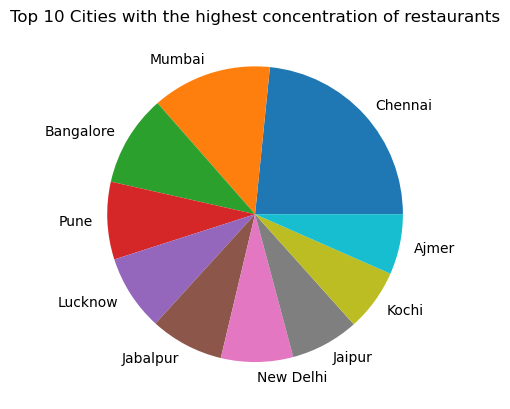

In [23]:
## Top 10 Cities with the highest concentration of restaurants
a = data["city"].value_counts().head(10)
print(a)
plt.pie(a, labels = a.index)
plt.title("Top 10 Cities with the highest concentration of restaurants")
plt.show()

### Cuisine Analysis:
-  Determine the most popular cuisines among the listed restaurants.
-  Investigate if there's a correlation between the variety of cuisines offered and
 restaurant ratings.

In [25]:
## Top 5 popular cuisines
data["cuisines"].value_counts().head()

cuisines
North Indian             17387
Fast Food                 6721
Cafe                      6190
North Indian, Chinese     5820
South Indian              5217
Name: count, dtype: int64

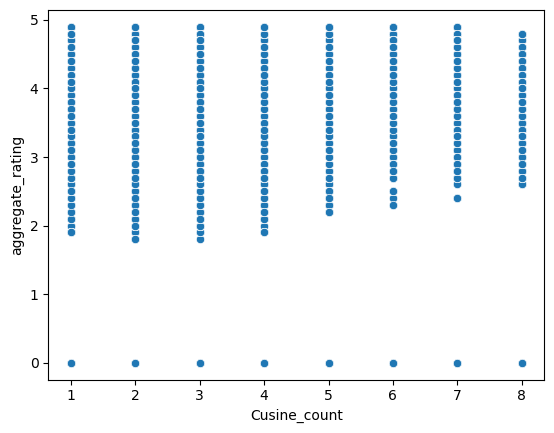

In [89]:
##Visualizing the Correlation between the variety of cuisines offered and restaurant ratings
data["Cusine_count"] = data["cuisines"].apply(lambda x: len(str(x).split(",")))
sns.scatterplot(x = data["Cusine_count"], y = "aggregate_rating", data = data )
plt.show()

### Price Range and Rating:
- Analyze the relationship between price range and restaurant ratings.
- Visualize the average cost for two people in different price categories.


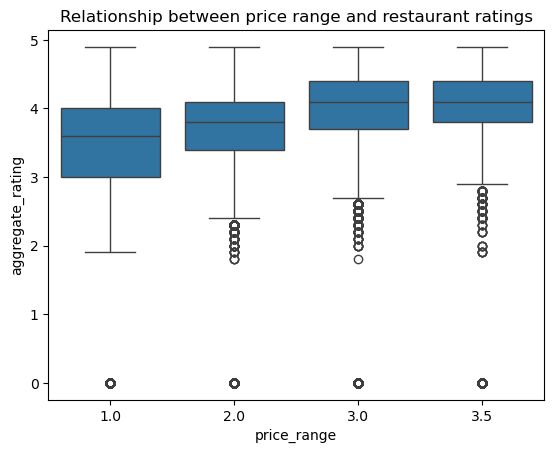

In [29]:
## Relationship between price range and restaurant ratings
sns.boxplot(data, x = "price_range", y = "aggregate_rating")
plt.title("Relationship between price range and restaurant ratings")
plt.show()

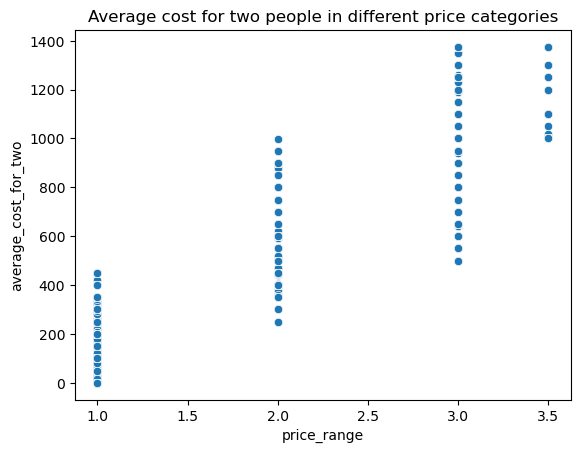

In [30]:
## Showing the average cost for two people in different price categories
sns.scatterplot(data, x = "price_range", y = "average_cost_for_two")
plt.title("Average cost for two people in different price categories")
plt.show()

### Online Order and Table Booking:
- Investigate the impact of online order availability on restaurant ratings.
- Analyze the distribution of restaurants that offer table booking.

In [32]:
data["delivery"].value_counts()

delivery
-1.0    132573
 1.0     78335
 0.0      1036
Name: count, dtype: int64

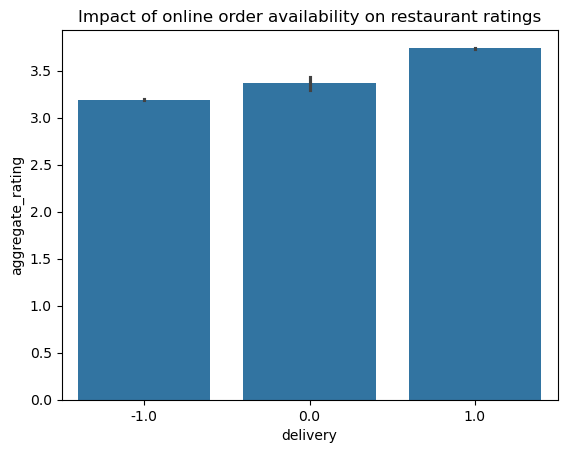

In [33]:
##Visualizing the impact of online order availability on restaurant ratings
sns.barplot(data, x = "delivery", y = "aggregate_rating")
plt.title("Impact of online order availability on restaurant ratings")
plt.show()

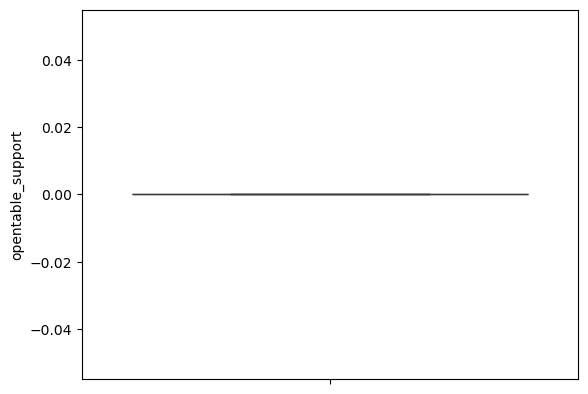

In [34]:
## Analyze the distribution of restaurants that offer table booking
sns.boxplot(data["opentable_support"])
plt.show()


###  Top Restaurant Chains:
-  Identify the top restaurant chains based on the number of outlets.
-  Explore the ratings of these top chains.

In [85]:
##Showing Top 10 restaurant chains based on the number of outlets
a = data["name"].value_counts()
b = pd.DataFrame(a)
b.head(10)

,count
name,
Domino's Pizza,3108
KFC,1343
Cafe Coffee Day,1068
Pizza Hut,936
Subway,766
Barbeque Nation,725
Burger King,658
McDonald's,578
Keventers,512


In [87]:
##Average Ratings of those top chains
chain = data.groupby("name").agg(
    number_outlets = ("name", "count"),
    avg_rating = ("aggregate_rating","mean")).sort_values(by = "number_outlets", ascending = False)
chain.head(10)

,number_outlets,avg_rating
name,,
Domino's Pizza,3108,3.716216
KFC,1343,3.913924
Cafe Coffee Day,1068,2.904963
Pizza Hut,936,3.726389
Subway,766,3.742950
Barbeque Nation,725,4.472966
Burger King,658,3.964438
McDonald's,578,3.912457
Keventers,512,3.809570


### Restaurant Features:
- Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol
 availability, etc.
- Investigate if the presence of certain features correlates with higher ratings.

In [39]:
data["highlights"].head()

0    ['Lunch', 'Takeaway Available', 'Credit Card',...
1    ['Delivery', 'No Alcohol Available', 'Dinner',...
2    ['No Alcohol Available', 'Dinner', 'Takeaway A...
3    ['Takeaway Available', 'Credit Card', 'Lunch',...
4    ['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...
Name: highlights, dtype: object

In [40]:
import ast

data["highlights"] = data["highlights"].apply(ast.literal_eval)


all_feat = set([j for i in data["highlights"] for j in i])


for i in all_feat:
    data[i] = data["highlights"].apply(lambda x: 1 if i in x else 0)

In [41]:
data["Wifi"].value_counts()

Wifi
0    192868
1     19076
Name: count, dtype: int64

In [42]:
def plot(data, x):
    df = data.groupby(x)["aggregate_rating"].mean()
    sns.barplot(df)
    plt.title(f"{x} vs aggregate_rating")
    plt.show()

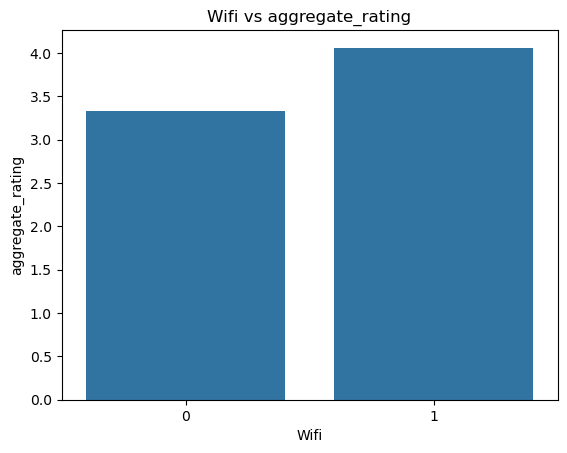

In [43]:
plot(data=data, x="Wifi")

<Axes: xlabel='No Alcohol Available', ylabel='aggregate_rating'>

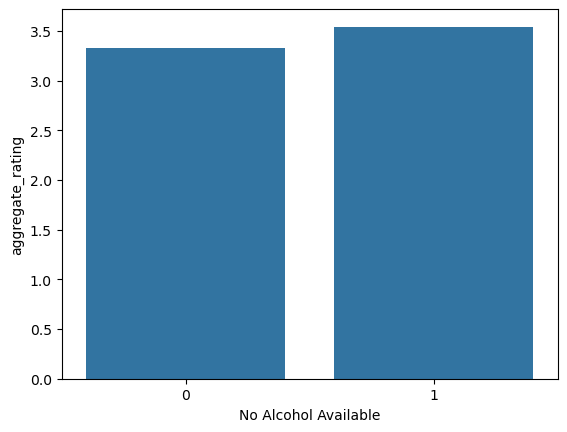

In [44]:
no_alcohol_rating = data.groupby("No Alcohol Available")["aggregate_rating"].mean()
sns.barplot(no_alcohol_rating)

### Word Cloud for Reviews:
- Create a word cloud based on customer reviews to identify common positive
 and negative sentiments.
- Analyze frequently mentioned words and sentiments.

In [46]:
from wordcloud import WordCloud

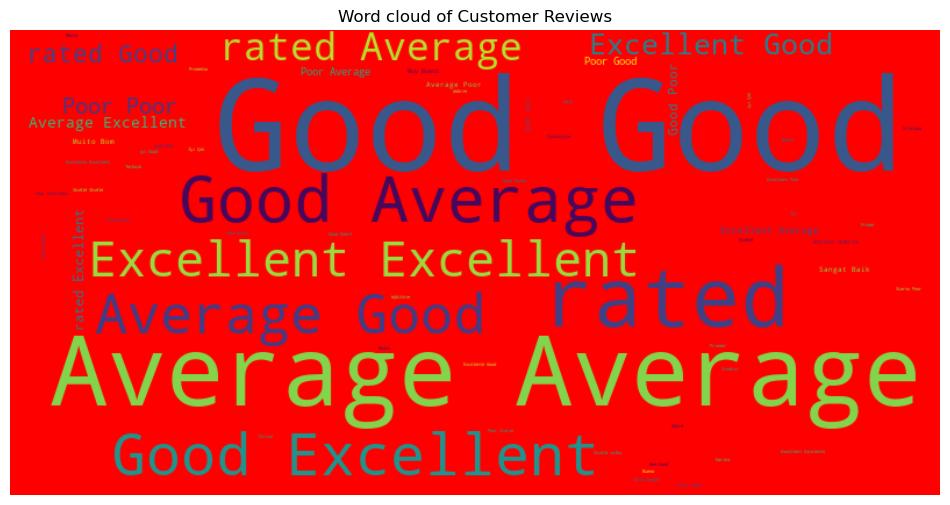

In [47]:
if "rating_text" in data.columns:
    review_txt = ' '.join(data["rating_text"].dropna().tolist())
    wordcloud = WordCloud(width = 800, height = 400, background_color = "red").generate(review_txt)
    plt.figure(figsize = (12,8))
    plt.imshow(wordcloud, interpolation =  "bilinear")
    plt.axis("off")
    plt.title("Word cloud of Customer Reviews")
    plt.show()